In [1]:
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

Загрузка данных и первая обученная модель

In [2]:
dataframe = pandas.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:, 0:4].astype(float)  # входные от 0 до 4
Y = dataset[:, 4]  # выходные

encoder = LabelEncoder()
encoder.fit(Y)  # загружаем выходные данные в энкодер
encoded_Y = encoder.transform(Y)  # считаем количество вариантов
dummy_y = to_categorical(encoded_Y)  # разбиваем

model = Sequential()  # есть один входной и один выходной тензор
model.add(Dense(4, activation='relu'))  # обычные нейронные слои с разной
model.add(Dense(3, activation='softmax'))  # функцией активации

model.compile(  # создание модели
    optimizer='adam',  # оптимизатор меняет веса исходя из функции потерь
    loss='categorical_crossentropy',  # функция потерь используется для поиска ошибок в процессе обучения. (разностью между оцененным и истинным значениями)
    metrics=['accuracy']  # точность модели
)
dat0 = model.fit(X, dummy_y, epochs=75, batch_size=10, validation_split=0.1)

Epoch 1/75
14/14 [==============================] - 1s 16ms/step - loss: 3.5888 - accuracy: 0.3704 - val_loss: 5.3617 - val_accuracy: 0.0000e+00
Epoch 2/75
14/14 [==============================] - 0s 4ms/step - loss: 3.2517 - accuracy: 0.3704 - val_loss: 4.5377 - val_accuracy: 0.0000e+00
Epoch 3/75
14/14 [==============================] - 0s 5ms/step - loss: 2.9201 - accuracy: 0.3704 - val_loss: 3.7574 - val_accuracy: 0.0000e+00
Epoch 4/75
14/14 [==============================] - 0s 4ms/step - loss: 2.6052 - accuracy: 0.3704 - val_loss: 2.9944 - val_accuracy: 0.0000e+00
Epoch 5/75
14/14 [==============================] - 0s 4ms/step - loss: 2.3085 - accuracy: 0.3704 - val_loss: 2.3161 - val_accuracy: 0.0000e+00
Epoch 6/75
14/14 [==============================] - 0s 5ms/step - loss: 2.0474 - accuracy: 0.3704 - val_loss: 1.7290 - val_accuracy: 0.0000e+00
Epoch 7/75
14/14 [==============================] - 0s 4ms/step - loss: 1.8403 - accuracy: 0.3704 - val_loss: 1.2292 - val_accuracy: 0.

обучение следующих моделей

In [3]:
model1 = Sequential()
model1.add(Dense(4, activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
dat1 = model1.fit(X, dummy_y, epochs=75, batch_size=3, validation_split=0.1)  # уменьшил изменение весов
model2 = Sequential()
model2.add(Dense(4, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
dat2 = model2.fit(X, dummy_y, epochs=25, batch_size=10, validation_split=0.1)  # уменьшил количество эпох
model3 = Sequential()
model3.add(Dense(4, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
dat3 = model3.fit(X, dummy_y, epochs=75, batch_size=10, validation_split=0.1)  # добавил еще один слой нейронов

Epoch 1/75
45/45 [==============================] - 1s 5ms/step - loss: 1.4865 - accuracy: 0.2593 - val_loss: 0.8607 - val_accuracy: 1.0000
Epoch 2/75
45/45 [==============================] - 0s 2ms/step - loss: 1.3226 - accuracy: 0.2963 - val_loss: 0.9221 - val_accuracy: 0.0000e+00
Epoch 3/75
45/45 [==============================] - 0s 2ms/step - loss: 1.2522 - accuracy: 0.3704 - val_loss: 0.9734 - val_accuracy: 0.0000e+00
Epoch 4/75
45/45 [==============================] - 0s 2ms/step - loss: 1.2072 - accuracy: 0.3704 - val_loss: 1.0084 - val_accuracy: 0.0000e+00
Epoch 5/75
45/45 [==============================] - 0s 2ms/step - loss: 1.1759 - accuracy: 0.3704 - val_loss: 1.0393 - val_accuracy: 0.0000e+00
Epoch 6/75
45/45 [==============================] - 0s 2ms/step - loss: 1.1538 - accuracy: 0.3704 - val_loss: 1.0797 - val_accuracy: 0.0000e+00
Epoch 7/75
45/45 [==============================] - 0s 2ms/step - loss: 1.1344 - accuracy: 0.3704 - val_loss: 1.1051 - val_accuracy: 0.0000e

график

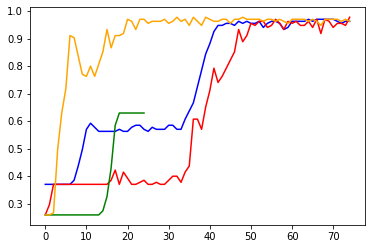

In [4]:
plt.plot(dat0.history['accuracy'], color='blue')
plt.plot(dat1.history['accuracy'], color='red')
plt.plot(dat2.history['accuracy'], color='green')
plt.plot(dat3.history['accuracy'], color='orange')
plt.show()